# Computer Vision

# MNIST Digit Classification

In this notebook, we will build and train a convolutional neural network (CNN) for classification of handwritten digits from the famous [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. The MNIST dataset consists of 60,000 training images and 10,000 test images. Our classes are the digits 0-9.

In [15]:
# Import Tensorflow 2.0
# %tensorflow_version 2.x
import tensorflow as tf 

# !pip install mitdeeplearning
# import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from tqdm import tqdm

# Check that we are using a GPU, if not switch runtimes
#   using Runtime > Change Runtime Type > GPU
#assert len(tf.config.list_physical_devices('GPU')) > 0

## 1.1 MNIST dataset 

Let's download and load the dataset and display a few random samples from it:

In [5]:
# import data

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
# check the data shapes
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
# reshape the data and rescale the data to normalize all values between 0 and 1 by dividing all values by 255

train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

In [8]:
# check the data shapes
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

Our training set is made up of 28x28 grayscale images of handwritten digits. 

Let's visualize what some of these images and their corresponding training labels look like.

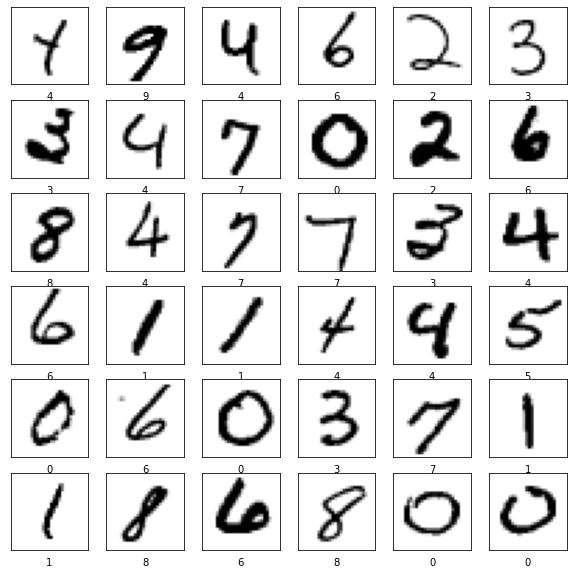

In [9]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

## 1.2 Neural Network for Handwritten Digit Classification

We'll first build a simple neural network consisting of two fully connected layers and apply this to the digit classification task. Our network will ultimately output a probability distribution over the 10 digit classes (0-9). This first architecture we will be building is depicted below:

![alt_text](https://raw.githubusercontent.com/aamini/introtodeeplearning/master/lab2/img/mnist_2layers_arch.png "CNN Architecture for MNIST Classification")


### Fully connected neural network architecture
To define the architecture of this first fully connected neural network, we'll use the Keras API and define the model using the [`Sequential`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential) class. And then use a [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) layer, which flattens the input so that it can be fed into the model. 

In [10]:
# function to create our fully connected model

def build_fc_model():
    
    # initialize model
    fc_model = tf.keras.Sequential([
        
    # First define a Flatten layer
    tf.keras.layers.Flatten(),

    # Add first dense layer with relu activation function
    tf.keras.layers.Dense(128, activation= 'relu'),

    # second Dense layer to output the classification probabilities
    tf.keras.layers.Dense(10, activation='softmax')

    ])
    # return the model
    return fc_model

# call function to create them model
model = build_fc_model()

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a 2d-array (28 x 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. You can think of this layer as unstacking rows of pixels in the image and lining them up. There are no learned parameters in this layer; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are fully-connected neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (the output) layer will return an array of probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the handwritten digit classes.

That defines our fully connected model! 



### Compile the model

Before training the model, we need to define a few more settings. These are added during the model's [`compile`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#compile) step:

* *Loss function* — This defines how we measure how accurate the model is during training. During training we want to minimize this function, which will "steer" the model in the right direction.
* *Optimizer* — This defines how the model is updated based on the data it sees and its loss function.
* *Metrics* — Here we can define metrics used to monitor the training and testing steps. In this example, we'll look at the *accuracy*, the fraction of the images that are correctly classified.

We'll start out by using a stochastic gradient descent (SGD) optimizer initialized with a learning rate of 0.1. Since we are performing a categorical classification task, use [cross entropy loss](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/sparse_categorical_crossentropy).

In [11]:
# model compilation

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1), 
              loss='sparse_categorical_crossentropy', # since we have converted data into float type
              metrics=['accuracy'])                   # using sparse_categorical_crossentropy

### Train the model

We're now ready to train our model, which will involve feeding the training data (`train_images` and `train_labels`) into the model, and then asking it to learn the associations between images and labels. We'll also need to define the batch size and the number of epochs, or iterations over the MNIST dataset, to use during training. 

In [12]:
# Define the batch size and the number of epochs to use during training
BATCH_SIZE = 64
EPOCHS = 5

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 6s 4ms/step - loss: 0.3743 - accuracy: 0.8959
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.2027 - accuracy: 0.9416
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1526 - accuracy: 0.9566
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1233 - accuracy: 0.9643
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1038 - accuracy: 0.9704


In [16]:
# can check the history of our training steps
pd.DataFrame(model.history.history)

,loss,accuracy
0,0.374274,0.895850
1,0.202670,0.941600
2,0.152574,0.956633
3,0.123287,0.964350
4,0.103774,0.970367


As the model trains, the loss and accuracy metrics are displayed. With five epochs and a learning rate of 0.01, this fully connected model achieved an accuracy of approximatley 0.97 (or 97%) on the training data.

### Evaluate accuracy on the test dataset

In [27]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.1108 - accuracy: 0.9674


[0.11080525070428848, 0.9674000144004822]

In [28]:
## get scores of the training 
model.evaluate(train_images, train_labels)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0945 - accuracy: 0.9724


[0.09451762586832047, 0.9724000096321106]

In [26]:
## evaluating the scores on the test dat
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.1108 - accuracy: 0.9674
Test accuracy: 0.9674000144004822


We observed that the accuracy on the test dataset is a little lower than the accuracy on the training dataset, seems the model i s overfitting with the training data.

Lets try to add pooling layers to regulate the model fitting rate and reduce over-fitting 

## 1.3 Convolutional Neural Network (CNN) for handwritten digit classification

Lets now build a CNN composed of two convolutional layers and pooling layers, followed by two fully connected layers, and ultimately output a probability distribution over the 10 digit classes (0-9). The CNN we will be building is depicted below:

![alt_text](https://raw.githubusercontent.com/aamini/introtodeeplearning/master/lab2/img/convnet_fig.png "CNN Architecture for MNIST Classification")

### Define the CNN model

We'll use the same training and test datasets as before, and proceed similarly as our fully connected network to define and train our new CNN model. To do this we will explore two layers we have not encountered before: we will use  [`keras.layers.Conv2D` ](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) to define convolutional layers and [`keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) to define the pooling layers. Use the parameters shown in the network architecture above to define these layers and build the CNN model.

In [29]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([

        # TODO: Define the first convolutional layer
        tf.keras.layers.Conv2D(filters=24, kernel_size=3, strides=2,activation='relu'), 

        # TODO: Define the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        # TODO: Define the second convolutional layer
        tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=2,activation='relu'), 

        # TODO: Define the second max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # output
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model()
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())

1/1 [==============================] - 1s 615ms/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 13, 24)        240       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 6, 24)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 32)          6944      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 

### Train and test the CNN model

Lets define the loss function, optimizer, and metrics

In [30]:
# compile the model
cnn_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [32]:
# fit the model
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=5)

Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1386 - accuracy: 0.9573
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1165 - accuracy: 0.9641
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1007 - accuracy: 0.9691
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0909 - accuracy: 0.9720
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0835 - accuracy: 0.9742


In [33]:
pd.DataFrame(cnn_model.history.history)

,loss,accuracy
0,0.138631,0.957283
1,0.116534,0.964083
2,0.100742,0.969067
3,0.090887,0.972033
4,0.083470,0.974167


## Model evaluation

In [34]:
# evaluate on test data
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1182 - accuracy: 0.9610
Test accuracy: 0.9610000252723694


In [35]:
print('Test Loss: ', test_loss)

Test Loss:  0.11821368336677551


### Make predictions with the CNN model

With the model trained, we can use it to make predictions about some images. The [`predict`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#predict) function call generates the output predictions given a set of input samples.


In [36]:
predictions = cnn_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [37]:
predictions

array([[6.6145008e-06, 5.8062549e-05, 1.6396985e-03, ..., 9.9807775e-01,
        2.1701169e-05, 8.7079454e-05],
       [9.9010111e-05, 1.5815833e-05, 9.9978894e-01, ..., 7.7225573e-05,
        9.3177852e-07, 6.5079524e-07],
       [1.2624706e-03, 9.9117893e-01, 7.0093130e-04, ..., 3.3499938e-04,
        9.7441341e-04, 2.7344888e-04],
       ...,
       [7.5916304e-09, 1.6625388e-07, 5.9772879e-07, ..., 8.0361895e-07,
        5.2552181e-03, 2.9056217e-04],
       [7.7926350e-09, 8.7993057e-10, 4.5099969e-07, ..., 7.4618908e-11,
        1.7397327e-03, 1.0188580e-06],
       [6.0446040e-05, 1.5548742e-04, 1.6703932e-02, ..., 2.2957524e-07,
        6.6363762e-05, 5.0364952e-06]], dtype=float32)

Lets check prediction value for the first test image

In [38]:
predictions[0]

array([6.6145008e-06, 5.8062549e-05, 1.6396985e-03, 7.6006101e-05,
       1.8003669e-07, 3.2959470e-05, 1.4542113e-09, 9.9807775e-01,
       2.1701169e-05, 8.7079454e-05], dtype=float32)

As you can see, a prediction is an array of 10 numbers. Recall that the output of our model is a probability distribution over the 10 digit classes. Thus, these numbers describe the model's "confidence" that the image corresponds to each of the 10 different digits. 

Let's look at the digit that has the highest confidence for the first image in the test dataset:

In [39]:
## identify the digit with the highest probability
prediction = np.argmax(predictions[0])

print(prediction)

7


Lets check the test label (remember, this is the true identity of the digit) to see if this prediction is correct:

Label of this digit is: 7


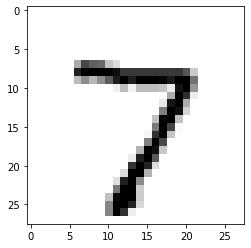

In [40]:
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)

## 1.4 Training the model 2.0

So far, we have used the [`fit`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#fit) function call to train the model. This function is quite high-level and intuitive, which is really useful for simpler models. But also, this function abstracts away many details in the training call, and we have less control over training model, which could be useful in other contexts. 

As an alternative to this, we can use the [`tf.GradientTape`](https://www.tensorflow.org/api_docs/python/tf/GradientTape) class to record differentiation operations during training, and then call the [`tf.GradientTape.gradient`](https://www.tensorflow.org/api_docs/python/tf/GradientTape#gradient) function to actually compute the gradients. Lets try using this approach

We'll train our `cnn_model` using stochastic gradient descent.

In [ ]:
# Rebuild the CNN model
cnn_model = build_cnn_model()

batch_size = 12
loss_history = mdl.util.LossHistory(smoothing_factor=0.95) # to record the evolution of the loss
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss', scale='semilogy')
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2) # define our optimizer

if hasattr(tqdm, '_instances'): tqdm._instances.clear() # clear if it exists

for idx in tqdm(range(0, train_images.shape[0], batch_size)):
  # First grab a batch of training data and convert the input images to tensors
  (images, labels) = (train_images[idx:idx+batch_size], train_labels[idx:idx+batch_size])
  images = tf.convert_to_tensor(images, dtype=tf.float32)

  # GradientTape to record differentiation operations
  with tf.GradientTape() as tape:
    #'''TODO: feed the images into the model and obtain the predictions'''
    logits = # TODO

    #'''TODO: compute the categorical cross entropy loss
    loss_value = tf.keras.backend.sparse_categorical_crossentropy() # TODO

  loss_history.append(loss_value.numpy().mean()) # append the loss to the loss_history record
  plotter.plot(loss_history.get())

  # Backpropagation
  '''TODO: Use the tape to compute the gradient against all parameters in the CNN model.
      Use cnn_model.trainable_variables to access these parameters.''' 
  grads = # TODO
  optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))


## Thank you